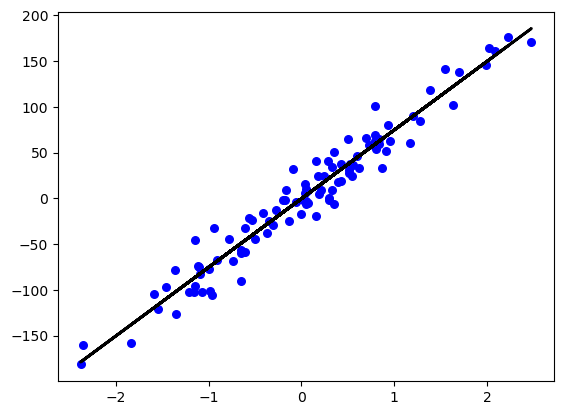

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.w = None
        self.b = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0  # Initialize b as 0

        for _ in range(self.n_iter + 1):
            y_predict = np.dot(X, self.w) + self.b
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - Y))
            db = (1 / n_samples) * np.sum(y_predict - Y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        y_predict = np.dot(X, self.w) + self.b
        return y_predict


x, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

reg = LinearRegression()
reg.fit(X_train, Y_train)
predictions = reg.predict(X_test)

y_pred_line = reg.predict(x)
plt.scatter(x, y, color="b", marker="o", s=30)
plt.plot(x, y_pred_line, color='black', linewidth=2)
plt.show()
